In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split, LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


def grid_search_optimization(model, tuned_parameters, X, y, Xh, yh, cv=5, scoring='accuracy'):
    print("# Tuning hyper-parameters for %s" %scoring)
    print()

    clf = GridSearchCV(model, tuned_parameters, cv=cv, n_jobs = -1, scoring=scoring, verbose=1)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report (holdout):")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = yh, clf.predict(Xh)
    print(classification_report(y_true, y_pred))
    print()
    
    return clf

## MSA vs PSP
Most difficult classes to differentiate

In [9]:
# Get the data
data = pd.read_csv('MSAvsPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

SVC: 0.740000 (0.165939)
Holdout:
0.76
[[19  8]
 [ 4 19]]
             precision    recall  f1-score   support

          0       0.83      0.70      0.76        27
          1       0.70      0.83      0.76        23

avg / total       0.77      0.76      0.76        50


Std: 0.693333 (0.140211)
Holdout:
0.64
[[15 12]
 [ 6 17]]
             precision    recall  f1-score   support

          0       0.71      0.56      0.63        27
          1       0.59      0.74      0.65        23

avg / total       0.66      0.64      0.64        50


Norm: 0.564444 (0.123008)
Holdout:
0.46
[[ 0 27]
 [ 0 23]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.46      1.00      0.63        23

avg / total       0.21      0.46      0.29        50


StdNorm: 0.760000 (0.095865)
Holdout:
0.66
[[15 12]
 [ 5 18]]
             precision    recall  f1-score   support

          0       0.75      0.56      0.64        27
        

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PCA45: 0.740000 (0.165939)
Holdout:
0.76
[[19  8]
 [ 4 19]]
             precision    recall  f1-score   support

          0       0.83      0.70      0.76        27
          1       0.70      0.83      0.76        23

avg / total       0.77      0.76      0.76        50


StdPCA45: 0.715556 (0.124544)
Holdout:
0.68
[[18  9]
 [ 7 16]]
             precision    recall  f1-score   support

          0       0.72      0.67      0.69        27
          1       0.64      0.70      0.67        23

avg / total       0.68      0.68      0.68        50


StdNormPCA45: 0.748889 (0.111244)
Holdout:
0.66
[[15 12]
 [ 5 18]]
             precision    recall  f1-score   support

          0       0.75      0.56      0.64        27
          1       0.60      0.78      0.68        23

avg / total       0.68      0.66      0.66        50


NormStdPCA45: 0.682222 (0.109341)
Holdout:
0.68
[[16 11]
 [ 5 18]]
             precision    recall  f1-score   support

          0       0.76      0.59      0.6

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


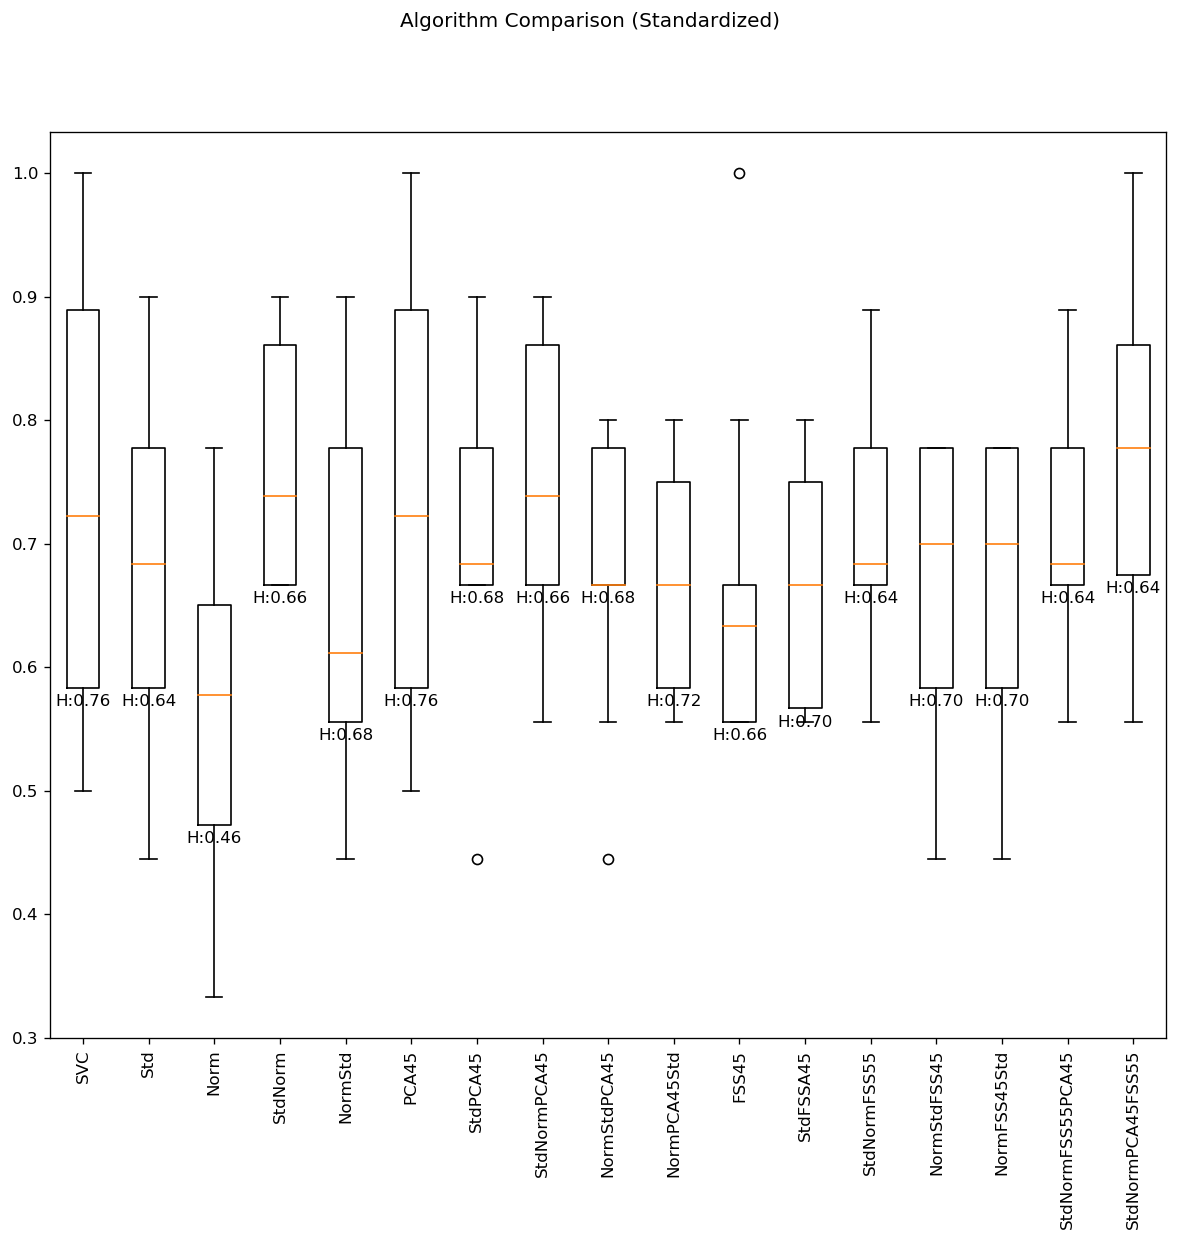

In [10]:
classif = SVC(kernel='linear')

pipelines = []
pipelines.append(('SVC', classif))
pipelines.append(('Std', Pipeline([('Scaler', StandardScaler()),('SVC', classif)])))
pipelines.append(('Norm', Pipeline([('Norm', Normalizer()),('SVC', classif)])))
pipelines.append(('StdNorm', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('SVC', classif)])))
pipelines.append(('NormStd', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('SVC', classif)])))


#PCA
pipelines.append(('PCA45', Pipeline([('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdPCA45', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormStdPCA45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormPCA45Std', Pipeline([('Norm', Normalizer()),('PCA', PCA(n_components=45)),('Scaler', StandardScaler()),('SVC', classif)])))

#FSS
pipelines.append(('FSS45', Pipeline([('FSS', SelectKBest(k=45)),('SVC', classif)])))
pipelines.append(('StdFSSA45', Pipeline([('Scaler', StandardScaler()),('FSS', SelectKBest(k=45)),('SVC', classif)])))


pipelines.append(('StdNormFSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormStdFSS45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormFSS45Std', Pipeline([('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('Scaler', StandardScaler()),('SVC', classif)])))

pipelines.append(('StdNormFSS55PCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45FSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('FSS', SelectKBest(k=25)),('SVC', classif)])))



results = []
names = []
accs = []

for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_test)

    H_acc = accuracy_score(Y_test, predictions)
    accs.append(H_acc)
    print(H_acc)
    print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    print()
    

# Compare Algorithms
fig = plt.figure(figsize=(12, 10), dpi= 120, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = plt.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x+.25,y-0.005, 'H:%.2f' % accs[idx],
         horizontalalignment='center', # centered
         verticalalignment='top')
    
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline as Pipeline2


import pandas as pd
import numpy as np

# Get the data
data = pd.read_csv('MSAvsPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# parameters and ranges to plot
param_grid = {
    "classifier__C": np.logspace(-5, 1, 20),
    #"PCA__n_components": range(1,115,10)
    "fss__k" : range(1,115,3)
}

clf = Pipeline2([
    ('Norm', Normalizer()),
    ('Scaler', StandardScaler()),
    #("Oversample", RandomOverSampler()),
    #('PCA', PCA()),
    ('fss',SelectKBest()),
    ('classifier', SVC(kernel='linear'))
])

best1 = grid_search_optimization(clf, param_grid, X_train, Y_train, X_test, Y_test, cv=20, scoring='f1_micro')

# Tuning hyper-parameters for f1_micro

Fitting 20 folds for each of 760 candidates, totalling 15200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 5940 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 11540 tasks      | elapsed:   21.4s


Best parameters set found on development set:

{'classifier__C': 0.12742749857031321, 'fss__k': 94}

Grid scores on development set:

0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 1}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 4}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 7}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 10}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 13}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 16}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 19}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 22}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 25}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 28}
0.525 (+/-0.087) for {'classifier__C': 1.0000000000000001e-05, 'fss__k': 31}
0.525 (+/-0.087) for {

[Parallel(n_jobs=-1)]: Done 15200 out of 15200 | elapsed:   27.3s finished


## PD vs MSA and PSP

In [12]:
# Get the data
data = pd.read_csv('PDvsMSAPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)

SVC: 0.846475 (0.050487)
Holdout:
0.863414634146
[[153   2]
 [ 26  24]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.92       155
          1       0.92      0.48      0.63        50

avg / total       0.87      0.86      0.85       205


Std: 0.807072 (0.055114)
Holdout:
0.814634146341
[[143  12]
 [ 26  24]]
             precision    recall  f1-score   support

          0       0.85      0.92      0.88       155
          1       0.67      0.48      0.56        50

avg / total       0.80      0.81      0.80       205


Norm: 0.757324 (0.007405)
Holdout:
0.756097560976
[[155   0]
 [ 50   0]]
             precision    recall  f1-score   support

          0       0.76      1.00      0.86       155
          1       0.00      0.00      0.00        50

avg / total       0.57      0.76      0.65       205




C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


StdNorm: 0.852296 (0.040991)
Holdout:
0.853658536585
[[150   5]
 [ 25  25]]
             precision    recall  f1-score   support

          0       0.86      0.97      0.91       155
          1       0.83      0.50      0.62        50

avg / total       0.85      0.85      0.84       205


PCA45: 0.851809 (0.046174)
Holdout:
0.858536585366
[[152   3]
 [ 26  24]]
             precision    recall  f1-score   support

          0       0.85      0.98      0.91       155
          1       0.89      0.48      0.62        50

avg / total       0.86      0.86      0.84       205


StdPCA45: 0.852161 (0.029626)
Holdout:
0.843902439024
[[144  11]
 [ 21  29]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       155
          1       0.72      0.58      0.64        50

avg / total       0.84      0.84      0.84       205


StdNormPCA45: 0.844327 (0.046421)
Holdout:
0.863414634146
[[152   3]
 [ 25  25]]
             precision    recall  f1-score  

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


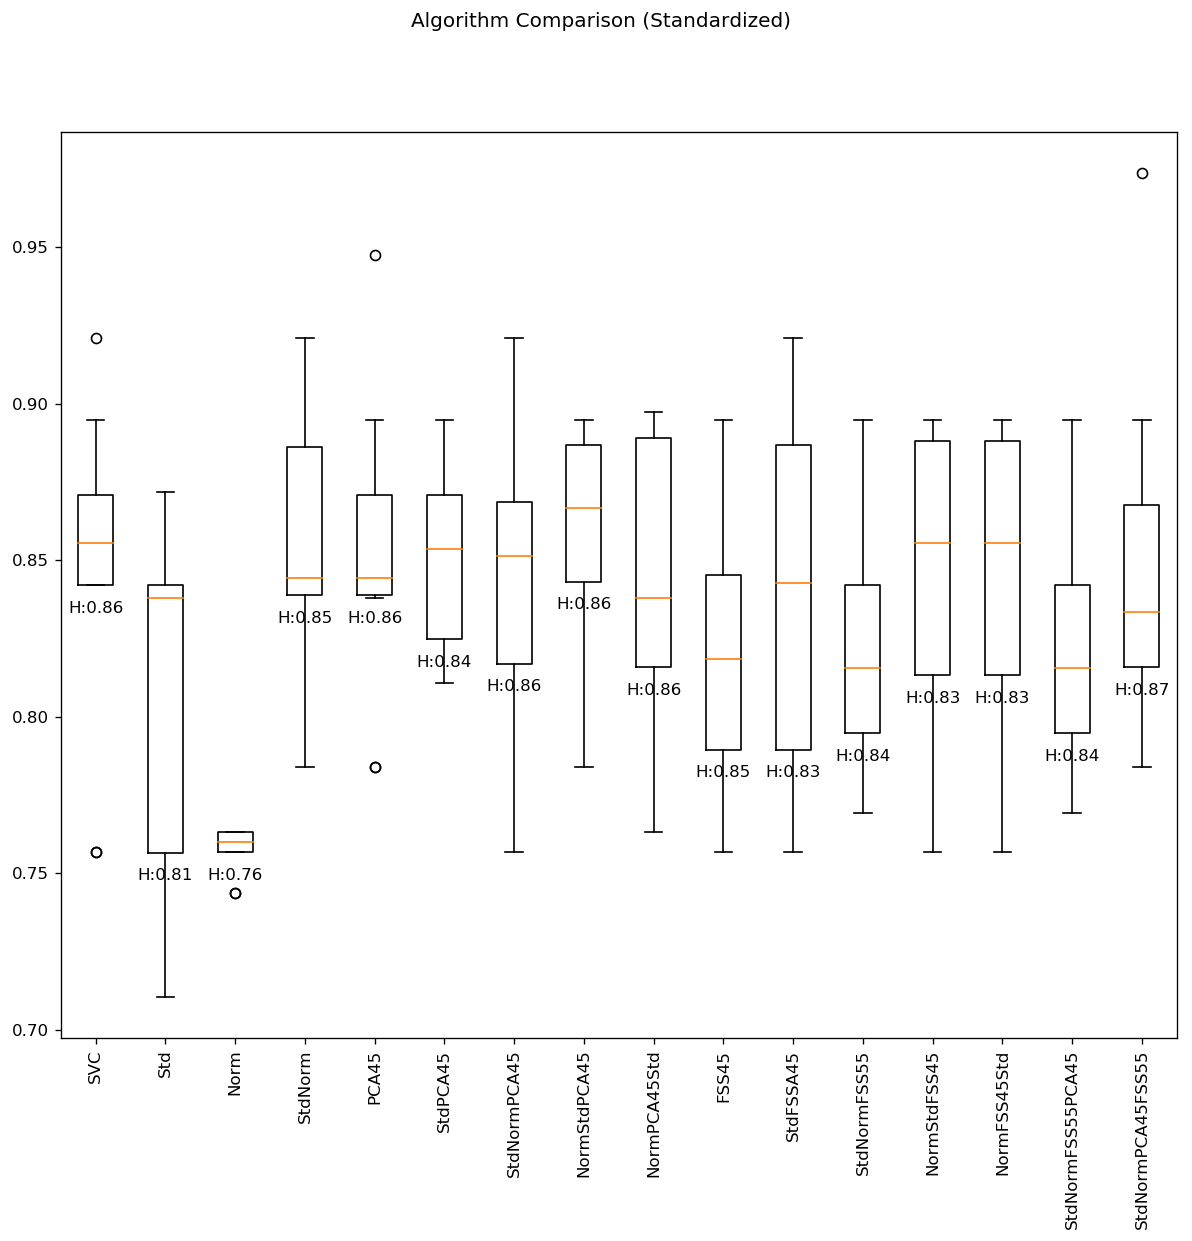

In [13]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

classif = SVC(kernel='linear')

pipelines = []
pipelines.append(('SVC', classif))
pipelines.append(('Std', Pipeline([('Scaler', StandardScaler()),('SVC', classif)])))
pipelines.append(('Norm', Pipeline([('Norm', Normalizer()),('SVC', classif)])))
pipelines.append(('StdNorm', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('SVC', classif)])))

#PCA
pipelines.append(('PCA45', Pipeline([('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdPCA45', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormStdPCA45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormPCA45Std', Pipeline([('Norm', Normalizer()),('PCA', PCA(n_components=45)),('Scaler', StandardScaler()),('SVC', classif)])))

#FSS
pipelines.append(('FSS45', Pipeline([('FSS', SelectKBest(k=45)),('SVC', classif)])))
pipelines.append(('StdFSSA45', Pipeline([('Scaler', StandardScaler()),('FSS', SelectKBest(k=45)),('SVC', classif)])))


pipelines.append(('StdNormFSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormStdFSS45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormFSS45Std', Pipeline([('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('Scaler', StandardScaler()),('SVC', classif)])))

pipelines.append(('StdNormFSS55PCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45FSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('FSS', SelectKBest(k=25)),('SVC', classif)])))


results = []
names = []
accs = []

for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_test)

    H_acc = accuracy_score(Y_test, predictions)
    accs.append(H_acc)
    print(H_acc)
    print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    print()
    

# Compare Algorithms
fig = plt.figure(figsize=(12, 10), dpi= 120, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = plt.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x+.25,y-0.005, 'H:%.2f' % accs[idx],
         horizontalalignment='center', # centered
         verticalalignment='top')

plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline as Pipeline2


import pandas as pd
import numpy as np

# Get the data
data = pd.read_csv('PDvsMSAPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# parameters and ranges to plot
param_grid = {
    "classifier__C": np.logspace(-5, 1, 20),
    #"PCA__n_components": range(1,115,10)
    #"fss__k" : range(1,115,3)
}

clf = Pipeline2([
    ('Norm', Normalizer()),
    ('Scaler', StandardScaler()),
    ("Oversample", RandomOverSampler()),
    #('PCA', PCA()),
    #('fss',SelectKBest()),
    ('classifier', SVC(kernel='linear'))
])

best1 = grid_search_optimization(clf, param_grid, X_train, Y_train, X_test, Y_test, cv=20, scoring='f1_micro')

# Tuning hyper-parameters for f1_micro

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 385 out of 400 | elapsed:   11.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.1s finished


Best parameters set found on development set:

{'classifier__C': 1.1288378916846884}

Grid scores on development set:

0.350 (+/-0.136) for {'classifier__C': 1.0000000000000001e-05}
0.370 (+/-0.169) for {'classifier__C': 2.06913808111479e-05}
0.578 (+/-0.192) for {'classifier__C': 4.2813323987193957e-05}
0.664 (+/-0.221) for {'classifier__C': 8.8586679041008327e-05}
0.703 (+/-0.218) for {'classifier__C': 0.00018329807108324357}
0.721 (+/-0.228) for {'classifier__C': 0.00037926901907322499}
0.767 (+/-0.195) for {'classifier__C': 0.00078475997035146064}
0.777 (+/-0.168) for {'classifier__C': 0.001623776739188721}
0.806 (+/-0.163) for {'classifier__C': 0.0033598182862837811}
0.799 (+/-0.156) for {'classifier__C': 0.0069519279617756054}
0.811 (+/-0.147) for {'classifier__C': 0.01438449888287663}
0.816 (+/-0.153) for {'classifier__C': 0.029763514416313162}
0.826 (+/-0.153) for {'classifier__C': 0.061584821106602607}
0.836 (+/-0.134) for {'classifier__C': 0.12742749857031321}
0.841 (+/-0.156

In [20]:
a = best1.best_estimator_.fit(X_train, Y_train)
a.score(X_test, Y_test)

0.83522727272727271

## Control vs All PD

In [39]:
# Get the data
data = pd.read_csv('CONvsPDMSAPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

SVC: 0.952504 (0.029296)
Holdout:
0.962085308057
[[ 59   1]
 [  7 144]]
             precision    recall  f1-score   support

          0       0.89      0.98      0.94        60
          1       0.99      0.95      0.97       151

avg / total       0.96      0.96      0.96       211


Std: 0.922593 (0.025744)
Holdout:
0.909952606635
[[ 52   8]
 [ 11 140]]
             precision    recall  f1-score   support

          0       0.83      0.87      0.85        60
          1       0.95      0.93      0.94       151

avg / total       0.91      0.91      0.91       211


Norm: 0.950967 (0.035110)
Holdout:
0.96682464455
[[ 59   1]
 [  6 145]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        60
          1       0.99      0.96      0.98       151

avg / total       0.97      0.97      0.97       211


StdNorm: 0.898906 (0.043954)
Holdout:
0.890995260664
[[ 44  16]
 [  7 144]]
             precision    recall  f1-score   support

      

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


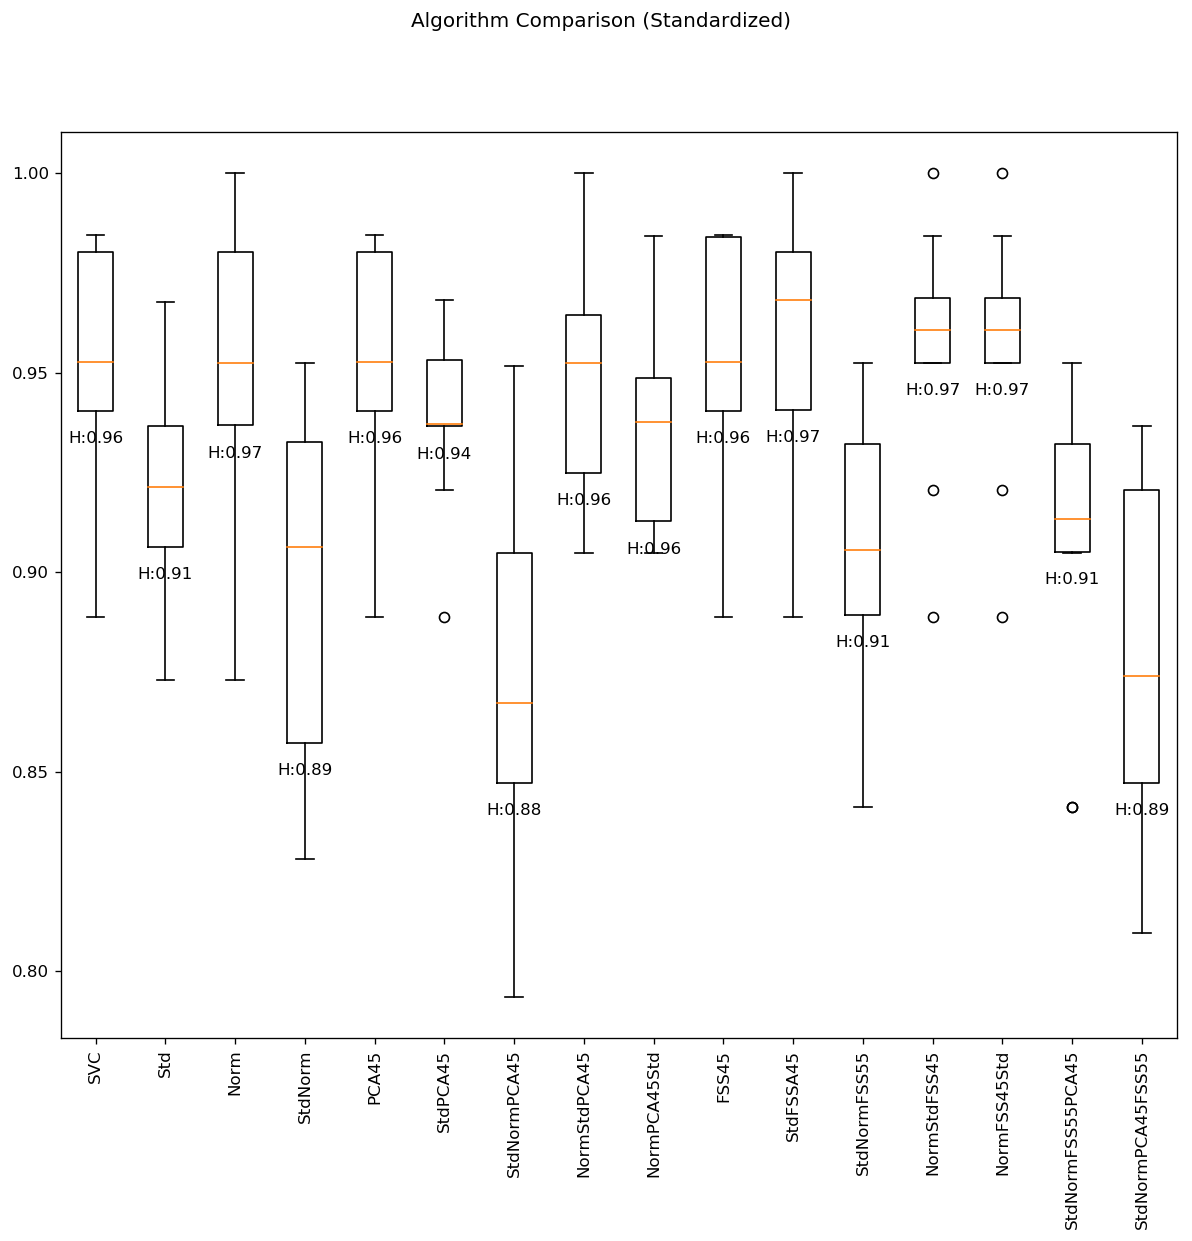

In [41]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

classif = SVC(kernel='linear')

pipelines = []
pipelines.append(('SVC', classif))
pipelines.append(('Std', Pipeline([('Scaler', StandardScaler()),('SVC', classif)])))
pipelines.append(('Norm', Pipeline([('Norm', Normalizer()),('SVC', classif)])))
pipelines.append(('StdNorm', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('SVC', classif)])))

#PCA
pipelines.append(('PCA45', Pipeline([('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdPCA45', Pipeline([('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormStdPCA45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('NormPCA45Std', Pipeline([('Norm', Normalizer()),('PCA', PCA(n_components=45)),('Scaler', StandardScaler()),('SVC', classif)])))

#FSS
pipelines.append(('FSS45', Pipeline([('FSS', SelectKBest(k=45)),('SVC', classif)])))
pipelines.append(('StdFSSA45', Pipeline([('Scaler', StandardScaler()),('FSS', SelectKBest(k=45)),('SVC', classif)])))


pipelines.append(('StdNormFSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormStdFSS45', Pipeline([('Norm', Normalizer()),('Scaler', StandardScaler()),('FSS', SelectKBest(k=55)),('SVC', classif)])))
pipelines.append(('NormFSS45Std', Pipeline([('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('Scaler', StandardScaler()),('SVC', classif)])))

pipelines.append(('StdNormFSS55PCA45', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('FSS', SelectKBest(k=55)),('PCA', PCA(n_components=45)),('SVC', classif)])))
pipelines.append(('StdNormPCA45FSS55', Pipeline([('Scaler', StandardScaler()),('Norm', Normalizer()),('PCA', PCA(n_components=45)),('FSS', SelectKBest(k=25)),('SVC', classif)])))


results = []
names = []
accs = []

for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_test)

    H_acc = accuracy_score(Y_test, predictions)
    accs.append(H_acc)
    print(H_acc)
    print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    print()
    

# Compare Algorithms
fig = plt.figure(figsize=(12, 10), dpi= 120, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = plt.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x+.25,y-0.005, 'H:%.2f' % accs[idx],
         horizontalalignment='center', # centered
         verticalalignment='top')

plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline as Pipeline2


import pandas as pd
import numpy as np

# Get the data
data = pd.read_csv('CONvsPDMSAPSP_Training.csv')
y = data['GroupID']
X = data.drop(['GroupID'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# parameters and ranges to plot
param_grid = {
    "classifier__C": np.logspace(-5, 1, 20),
    #"PCA__n_components": range(1,115,5)
    #"fss__k" : range(1,115,3)
}

clf = Pipeline2([
    ('Norm', Normalizer()),
    ('Scaler', StandardScaler()),
    ("Oversample", RandomOverSampler()),
    #('PCA', PCA()),
    #('fss',SelectKBest()),
    ('classifier', SVC(kernel='linear'))
])

best2 = grid_search_optimization(clf, param_grid, X_train, Y_train, X_test, Y_test, cv=20)

# Tuning hyper-parameters for accuracy

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.2s


Best parameters set found on development set:

{'classifier__C': 0.12742749857031321}

Grid scores on development set:

0.725 (+/-0.089) for {'classifier__C': 1.0000000000000001e-05}
0.732 (+/-0.139) for {'classifier__C': 2.06913808111479e-05}
0.746 (+/-0.137) for {'classifier__C': 4.2813323987193957e-05}
0.746 (+/-0.130) for {'classifier__C': 8.8586679041008327e-05}
0.766 (+/-0.125) for {'classifier__C': 0.00018329807108324357}
0.793 (+/-0.140) for {'classifier__C': 0.00037926901907322499}
0.831 (+/-0.128) for {'classifier__C': 0.00078475997035146064}
0.846 (+/-0.132) for {'classifier__C': 0.001623776739188721}
0.892 (+/-0.109) for {'classifier__C': 0.0033598182862837811}
0.925 (+/-0.090) for {'classifier__C': 0.0069519279617756054}
0.947 (+/-0.062) for {'classifier__C': 0.01438449888287663}
0.953 (+/-0.062) for {'classifier__C': 0.029763514416313162}
0.949 (+/-0.070) for {'classifier__C': 0.061584821106602607}
0.959 (+/-0.055) for {'classifier__C': 0.12742749857031321}
0.947 (+/-0.07

[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.4s finished


In [5]:
best2.score(X_test, Y_test)

0.94466403162055335

Avoid using FSS in SVM since it leads to overfitting
https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality